# Mobile Price prediction

In [2]:
import pandas as pd
import numpy as np

In [3]:
mobile = pd.read_csv('dataset.csv')
mobile.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
##  Price_range: This is the target
# 0=lowcost
# 1=mediumcost
# 2=highcost
# 3=veryhigh cost

### ideology for the mobile price predictor
- we want know which factor effects to predict price of mobile
- Generally
```1.battery_power```
```2.clock_speed```
```3.four_g```
```4.fc```
```5.pc```
```6.ram```
```7.sc_h```
```8.touch_screen```
```9.wifi```
Those think can make price of mobile

In [6]:
mobile.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
mobile['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

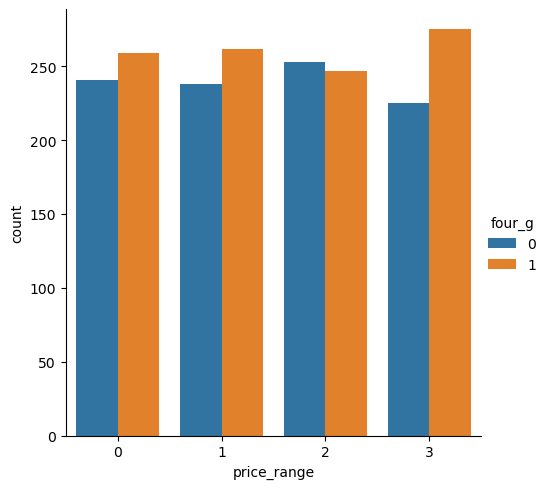

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.catplot(x='price_range',hue='four_g' ,data=mobile, kind='count')

<Axes: xlabel='price_range', ylabel='count'>

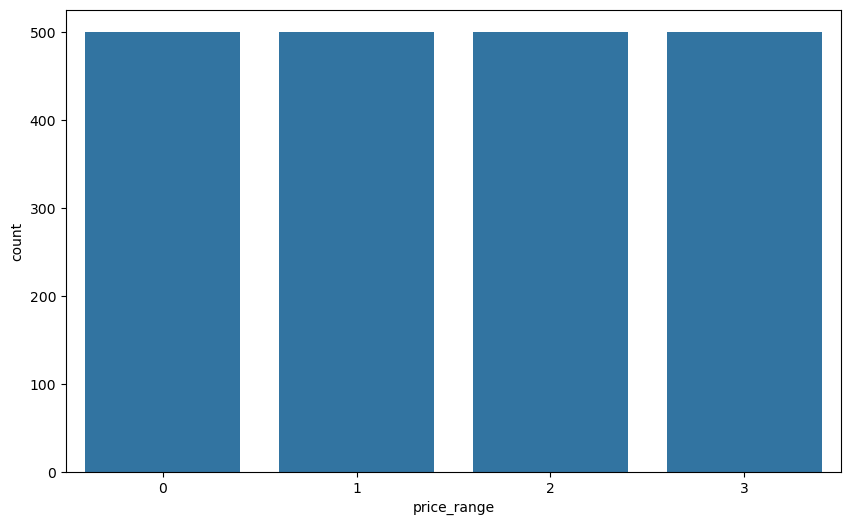

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.countplot(x='price_range', data=mobile)


# preproccesing the data

Based on the previous subtask's output, there are no missing values and no categorical features in the dataset. All features are numerical and need to be scaled for model training. StandardScaler is a suitable scaling method.

In [16]:
from sklearn.preprocessing import StandardScaler

# identify numeriacal features (excluding target 'price_range')
numerical_features = mobile.columns.drop('price_range')

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to numerical features
mobile[numerical_features] = scaler.fit_transform(mobile[numerical_features])

mobile.head()



,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,...,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097,1
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,...,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099,2
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,...,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099,2
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,...,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099,2
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,...,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099,1


Calculate the correlation matrix, extract the correlation with the target variable, sort them by absolute value, and print the results to identify relevant feature

In [18]:
# Calculate the correlation matrix
correlation_matrix = mobile.corr()
# Extract the correlation with the target variable 'price_range'
price_range_correlation = correlation_matrix['price_range']
# Sort the correlations by absolute value
sorted_correlations = price_range_correlation.abs().sort_values(ascending=False)
# Print the sorted correlations
print(sorted_correlations)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
touch_screen     0.030411
mobile_wt        0.030302
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
clock_speed      0.006606
n_cores          0.004399
m_dep            0.000853
Name: price_range, dtype: float64


# Training the data

In [ ]:
from sklearn.model_selection import train_test_split
X = mobile.drop('price_range', axis=1)
y = mobile['price_range']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [19]:
# Import the RandomForestClassifier model and train it on the training data
from sklearn.ensemble import RandomForestClassifier

model =RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

# Evaluting model

In [21]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.8925
Precision: 0.8961376040265876
Recall: 0.8925
F1 Score: 0.8933396464201718
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.89      0.87      0.88        91
           2       0.78      0.87      0.82        92
           3       0.94      0.87      0.90       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400



In [26]:
print(f"prediction ;{y_pred}")

prediction ;[0 2 1 3 1 2 2 0 3 1 0 1 2 3 2 2 3 3 1 0 0 1 1 2 0 1 2 2 2 0 0 0 3 0 1 1 2
 0 3 0 2 3 2 0 3 2 1 1 3 1 3 1 0 0 1 1 1 2 0 0 1 3 3 1 0 0 3 3 1 2 2 3 0 1
 2 0 0 3 2 2 3 2 1 0 1 3 2 3 3 0 3 3 2 1 3 2 2 3 2 1 0 0 1 0 0 3 2 0 1 1 0
 0 3 1 2 2 3 2 0 2 1 3 2 1 3 3 0 3 0 2 3 0 2 2 0 3 1 0 0 2 3 0 2 2 0 0 0 1
 1 2 3 1 1 0 2 2 0 1 0 2 2 3 2 2 1 0 0 2 2 3 3 1 1 0 3 1 1 2 1 0 0 0 0 0 3
 2 0 3 0 0 0 0 1 3 3 1 0 1 2 1 1 2 2 2 3 3 1 2 0 0 0 2 1 1 3 1 0 2 1 1 3 2
 3 0 0 2 1 2 0 0 2 0 1 3 2 0 1 3 3 0 1 3 2 3 0 3 1 2 3 3 2 1 1 3 3 1 3 3 3
 3 3 0 1 2 2 2 2 0 2 3 2 2 2 1 0 2 0 3 3 1 3 1 0 3 1 2 0 0 2 0 1 2 3 3 3 1
 0 0 1 3 3 0 1 2 2 0 3 3 2 3 1 3 2 0 2 1 2 1 0 0 0 3 2 3 1 0 1 0 1 3 2 0 3
 3 2 1 3 0 0 3 1 3 2 0 1 1 2 1 1 3 1 0 0 2 3 0 3 0 0 2 0 1 2 2 2 3 0 3 2 2
 3 3 3 2 1 2 0 3 1 3 3 0 2 3 2 3 3 3 0 0 2 3 0 0 2 3 2 1 1 2]


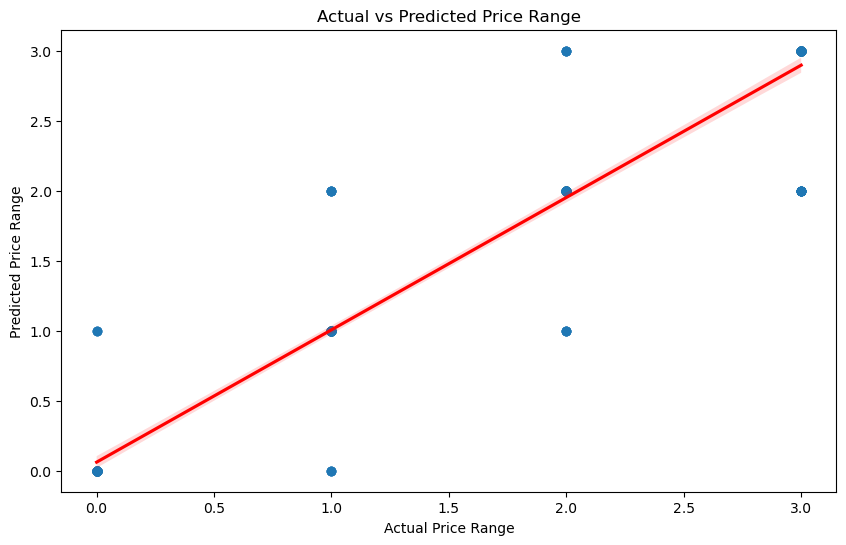

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the actual vs predicted price range
# creating the regression plot
plt.figure(figsize=(10, 6))


sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"})
plt.xlabel('Actual Price Range')
plt.ylabel('Predicted Price Range')
plt.title('Actual vs Predicted Price Range')
plt.show()



In [25]:
# Create function to predict the price using y_pred
battery_power=int(input("Enter battery power: "))
bluetooth=int(input("Enter bluetooth: "))
clock_speed=float(input("Enter clock speed: "))
dual_sim=int(input("Enter dual sim: "))
fc=int(input("Enter fc: "))
four_g=int(input("Enter four g: "))
int_memory=int(input("Enter int memory: "))
pc=int(input("Enter pc: "))
ram=int(input("Enter ram: "))
sc_h=int(input("Enter sc h: "))
touch_screen=int(input("Enter touch screen: "))
wifi=int(input("Enter wifi: "))

def price_range(battery_power, bluetooth, clock_speed, dual_sim, fc, four_g, int_memory, pc, ram, sc_h, touch_screen, wifi):
  input_data = [[battery_power, bluetooth, clock_speed, dual_sim, fc, four_g, int_memory, pc, ram, sc_h, touch_screen, wifi]]
  y_pred = model.predict(input_data)
  return y_pred[0]




